### Import all necessary libraries

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 589.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.8/744.8 kB 5.1 MB/s eta 0:00:00


In [2]:
# import all necessary libraries
import numpy as np 
import pandas as pd 
import os
import random
from PIL import Image
import cv2
from IPython.display import Video
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

from ultralytics import YOLO

In [3]:
# trun off wandb reporting for this notebook
os.environ['WANDB_DISABLED'] = 'true'

### Explore the datasets

#### Check the training images

In [4]:
train_img_dir = '/kaggle/input/cardetection/train/images'

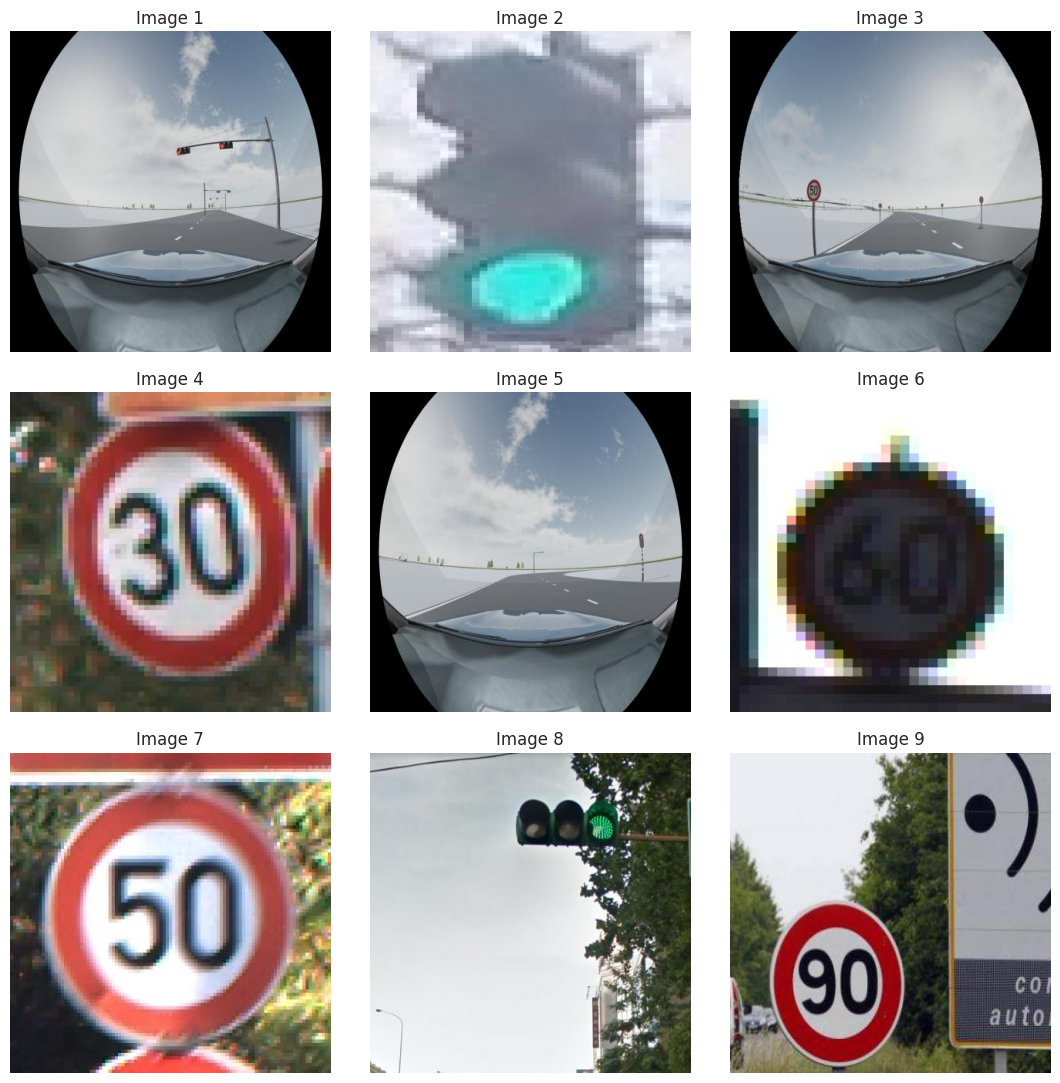

In [5]:
num_samples = 9
image_files = os.listdir(train_img_dir)
rand_imgs = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3,3, figsize = (11, 11))
for i in range(num_samples):
    image = rand_imgs[i]
    ax = axes[i // 3, i%3]
    ax.imshow(plt.imread(os.path.join(train_img_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Model YOLOv8

#### Check out the pre-trained YOLOv8 Model

In [6]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.5MB/s]



image 1/1 /kaggle/input/cardetection/train/images/FisheyeCamera_1_00984_png.rf.220eeaf6ed08501807f5bab1aa196b83.jpg: 416x416 1 traffic light, 8.6ms
Speed: 7.2ms preprocess, 8.6ms inference, 710.9ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/train/images/33991e43-090d-4b63-b9ed-52e79abb6644_jpg.rf.9042ef786e9e66624ddd632fe7f844cf.jpg: 416x416 (no detections), 6.9ms
Speed: 1.1ms preprocess, 6.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/train/images/FisheyeCamera_1_00072_png.rf.9d250c0e260b80b71ca30a7b130c7a00.jpg: 416x416 (no detections), 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/train/images/00001_00028_00021_png.rf.051488a2bc7c02e95907748e57b7cdb7.jpg: 416x416 1 train, 7.2ms
Speed: 1.0ms preprocess, 7.2ms inference, 116.2ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /k

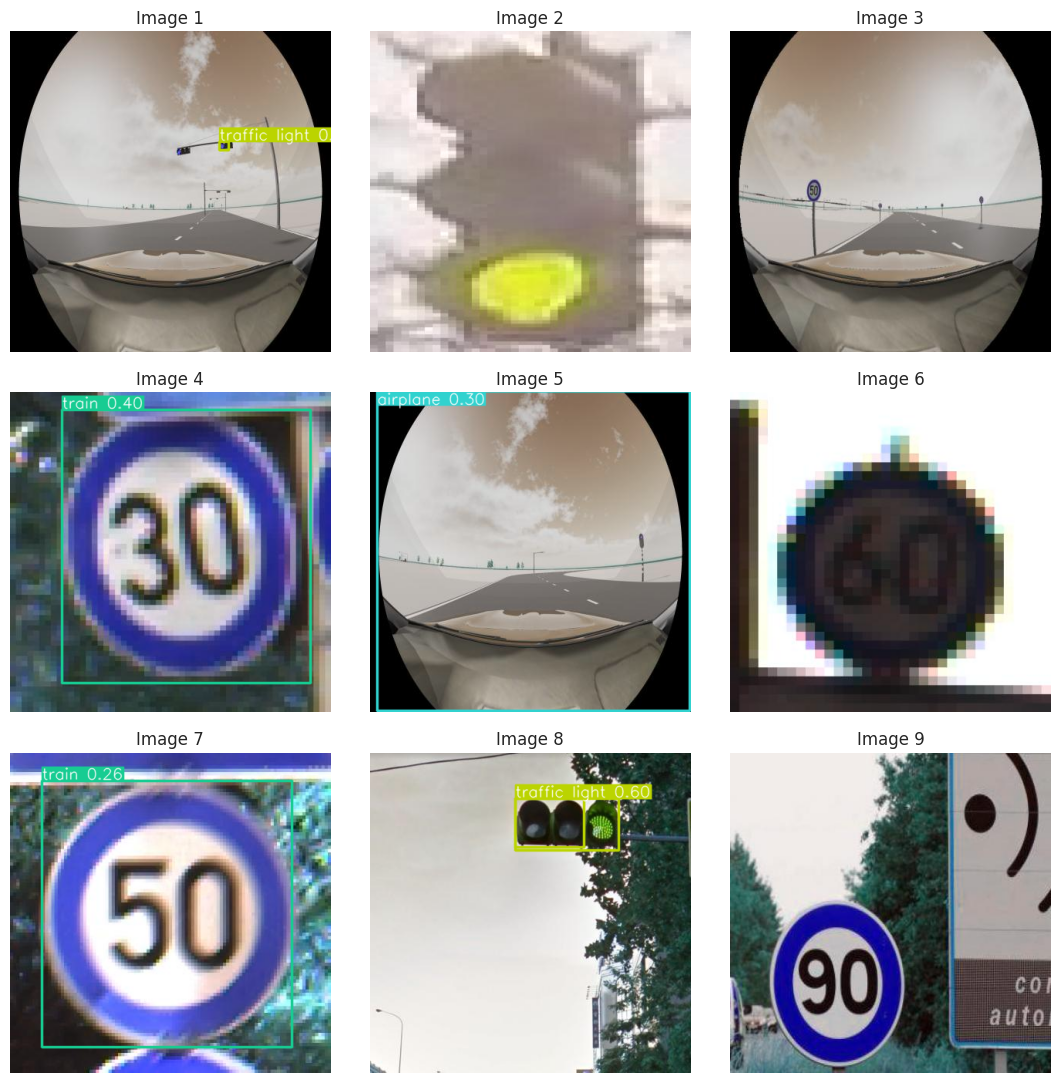

In [7]:
fig, axes = plt.subplots(3,3, figsize = (11, 11))
for i in range(num_samples):
    image = rand_imgs[i]
    ax = axes[i // 3, i%3]
    result_predict = model.predict(source = os.path.join(train_img_dir, image), imgsz = (416))
    ax.imshow(result_predict[0].plot())
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Fine-tune YOLOv8 with given training dataset

In [8]:
final_model = YOLO('yolov8n.yaml').load('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 200MB/s]


Transferred 94/355 items from pretrained weights


In [9]:
Result_Final_model = final_model.train(data="/kaggle/input/cardetection/data.yaml",epochs=50, imgsz = 416, device = 0)

Ultralytics YOLOv8.1.41 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/cardetection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 13.8MB/s]
2024-04-02 03:59:07,308	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-02 03:59:08,376	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-02 03:59:12.712173: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-02 03:59:12.712283: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-02 03:59:12.971575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Tracking run with wandb version 0.16.4
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:21<00:00, 162.10it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:04<00:00, 160.72it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.12G      3.116      4.817      2.895         29        416: 100%|██████████| 221/221 [00:32<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.22it/s]

                   all        801        944      0.584     0.0265     0.0094    0.00274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.15G      2.094       3.91      1.952         24        416: 100%|██████████| 221/221 [00:26<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.91it/s]


                   all        801        944      0.439      0.295      0.116     0.0794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.15G      1.332      2.788      1.317         26        416: 100%|██████████| 221/221 [00:26<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.34it/s]


                   all        801        944      0.191      0.408      0.117     0.0885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.15G      1.091      2.393      1.171         30        416: 100%|██████████| 221/221 [00:26<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.27it/s]


                   all        801        944      0.174       0.47      0.182      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.15G      1.004      2.188      1.124         29        416: 100%|██████████| 221/221 [00:25<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.43it/s]

                   all        801        944      0.178      0.504      0.205      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.13G     0.9245      2.052      1.083         28        416: 100%|██████████| 221/221 [00:26<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.63it/s]

                   all        801        944      0.281      0.489      0.252      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.14G     0.8974      1.973      1.081         18        416: 100%|██████████| 221/221 [00:25<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.47it/s]

                   all        801        944      0.262      0.458      0.262      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.14G     0.8589      1.867      1.065         18        416: 100%|██████████| 221/221 [00:26<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.70it/s]


                   all        801        944      0.269      0.556       0.28      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.14G     0.8497       1.83      1.057         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.88it/s]


                   all        801        944      0.249      0.472      0.306      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.13G     0.8217      1.772       1.04         16        416: 100%|██████████| 221/221 [00:26<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.70it/s]


                   all        801        944      0.326      0.468      0.338      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.14G     0.7912      1.717      1.028         26        416: 100%|██████████| 221/221 [00:26<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.75it/s]


                   all        801        944      0.298      0.525      0.334      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.14G     0.7797      1.685      1.021         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.70it/s]


                   all        801        944      0.318       0.47      0.348      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.14G     0.7724      1.646      1.014         23        416: 100%|██████████| 221/221 [00:26<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.94it/s]


                   all        801        944      0.322      0.514      0.358      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.13G     0.7515       1.61      1.007         31        416: 100%|██████████| 221/221 [00:26<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.76it/s]


                   all        801        944      0.357        0.5       0.39      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.14G     0.7501      1.602      1.008         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.82it/s]

                   all        801        944      0.357      0.517        0.4      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.14G     0.7442      1.569      1.002         21        416: 100%|██████████| 221/221 [00:26<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.67it/s]

                   all        801        944      0.368       0.53      0.415      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.14G     0.7273       1.53     0.9992         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.84it/s]


                   all        801        944      0.351      0.507      0.429      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.13G     0.7154      1.504     0.9977         24        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.93it/s]


                   all        801        944      0.433      0.527      0.464      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.14G     0.6921      1.484     0.9799         18        416: 100%|██████████| 221/221 [00:25<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.82it/s]


                   all        801        944      0.443      0.543      0.491      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.14G     0.6976      1.489     0.9865         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.74it/s]


                   all        801        944      0.504      0.524      0.491       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.14G     0.7119      1.478     0.9926         13        416: 100%|██████████| 221/221 [00:26<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]


                   all        801        944      0.503      0.523      0.538      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.13G     0.6918      1.409     0.9819         21        416: 100%|██████████| 221/221 [00:26<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]


                   all        801        944      0.548      0.514      0.565      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.14G     0.6888      1.388     0.9811         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.80it/s]


                   all        801        944        0.5      0.525       0.56      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.14G     0.6746      1.337     0.9769         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]


                   all        801        944      0.521      0.597      0.592      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.14G     0.6762      1.328     0.9763         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.80it/s]


                   all        801        944      0.631      0.579      0.622      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.13G     0.6722      1.304     0.9729         28        416: 100%|██████████| 221/221 [00:26<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.72it/s]


                   all        801        944      0.597      0.585      0.602      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.14G     0.6599      1.267     0.9634         23        416: 100%|██████████| 221/221 [00:26<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.66it/s]


                   all        801        944      0.637      0.604      0.658      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.14G     0.6561      1.238     0.9682         16        416: 100%|██████████| 221/221 [00:26<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.90it/s]


                   all        801        944       0.69      0.607      0.664      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.14G     0.6642      1.218     0.9689         20        416: 100%|██████████| 221/221 [00:25<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.72it/s]


                   all        801        944      0.743      0.614      0.691      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.13G     0.6519      1.174     0.9696         30        416: 100%|██████████| 221/221 [00:26<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.81it/s]


                   all        801        944       0.82      0.627      0.732      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.14G     0.6653      1.171     0.9704         27        416: 100%|██████████| 221/221 [00:25<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.71it/s]


                   all        801        944      0.729      0.654       0.73       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.14G     0.6434      1.139     0.9619         19        416: 100%|██████████| 221/221 [00:26<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.92it/s]


                   all        801        944      0.783      0.652      0.739       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.14G     0.6351      1.109     0.9611         32        416: 100%|██████████| 221/221 [00:26<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.91it/s]


                   all        801        944      0.761      0.653       0.74      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.13G     0.6383      1.095     0.9576         25        416: 100%|██████████| 221/221 [00:26<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.88it/s]


                   all        801        944       0.83      0.659      0.759      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.14G      0.627      1.048     0.9567         22        416: 100%|██████████| 221/221 [00:26<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.83it/s]


                   all        801        944      0.815      0.662      0.753      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.14G     0.6283      1.035     0.9576         20        416: 100%|██████████| 221/221 [00:26<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.67it/s]


                   all        801        944      0.819      0.687      0.774      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.14G     0.6242      1.034     0.9529         20        416: 100%|██████████| 221/221 [00:25<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.43it/s]

                   all        801        944      0.825      0.685      0.784      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.13G       0.61          1     0.9507         20        416: 100%|██████████| 221/221 [00:25<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.42it/s]


                   all        801        944      0.819      0.699      0.776      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.14G     0.6137       1.01     0.9523         22        416: 100%|██████████| 221/221 [00:25<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.43it/s]


                   all        801        944      0.776      0.714      0.785      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.14G     0.6007     0.9878     0.9484         28        416: 100%|██████████| 221/221 [00:25<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.58it/s]


                   all        801        944      0.858      0.687      0.792      0.682
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.14G     0.5978      0.781     0.9147         12        416: 100%|██████████| 221/221 [00:25<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.71it/s]

                   all        801        944      0.887      0.689      0.794      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.13G      0.588     0.7381     0.9137         13        416: 100%|██████████| 221/221 [00:23<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.48it/s]


                   all        801        944      0.873      0.716      0.814      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.14G     0.5786     0.7039     0.9011         11        416: 100%|██████████| 221/221 [00:23<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.95it/s]


                   all        801        944      0.829      0.742      0.818      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.14G     0.5771     0.6991     0.9033         10        416: 100%|██████████| 221/221 [00:24<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.81it/s]


                   all        801        944       0.87      0.733      0.824      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.14G     0.5669     0.6807     0.8981         12        416: 100%|██████████| 221/221 [00:24<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.77it/s]


                   all        801        944      0.899      0.741      0.833      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.13G     0.5571     0.6628     0.8942         10        416: 100%|██████████| 221/221 [00:24<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.76it/s]

                   all        801        944      0.848      0.733      0.822      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.14G     0.5553     0.6441     0.8946         13        416: 100%|██████████| 221/221 [00:24<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.82it/s]


                   all        801        944      0.925      0.721       0.84      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.14G     0.5528     0.6429     0.8958         11        416: 100%|██████████| 221/221 [00:24<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.72it/s]

                   all        801        944      0.914      0.744      0.843      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.14G     0.5484     0.6326     0.8908         12        416: 100%|██████████| 221/221 [00:24<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:03<00:00,  6.96it/s]


                   all        801        944      0.908      0.746      0.844      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.13G     0.5485      0.623     0.8947         12        416: 100%|██████████| 221/221 [00:23<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  6.36it/s]


                   all        801        944      0.904      0.748      0.845      0.728

50 epochs completed in 0.426 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.41 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.44it/s]


                   all        801        944      0.909      0.746      0.844       0.73
           Green Light        801        122      0.863      0.492      0.591      0.311
             Red Light        801        108      0.832      0.454      0.571      0.301
       Speed Limit 100        801         52      0.791      0.871      0.909      0.808
       Speed Limit 110        801         17      0.916      0.765      0.843      0.779
       Speed Limit 120        801         60       0.96      0.806       0.93      0.859
        Speed Limit 20        801         56       0.98      0.893      0.962      0.836
        Speed Limit 30        801         74      0.984      0.832      0.935      0.859
        Speed Limit 40        801         55      0.876       0.77      0.883      0.771
        Speed Limit 50        801         71      0.967      0.746      0.874      0.797
        Speed Limit 60        801         76      0.948      0.803      0.878      0.802
        Speed Limit 7

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃▆████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇█████████
wandb:     metrics/mAP50-95(B) ▁▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████
wandb:    metrics/precision(B) ▅▃▁▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▆▆▆▇▆▇▇▇▇▇██▇▇▇███
wandb:       metrics/recall(B) ▁▄▅▅▆▅▆▅▆▅▆▆▆▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇██▇███████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▅▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:          train/cls_loss █▆▅▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▅▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:            val/box_loss █▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁

### Analyze the final model's performance

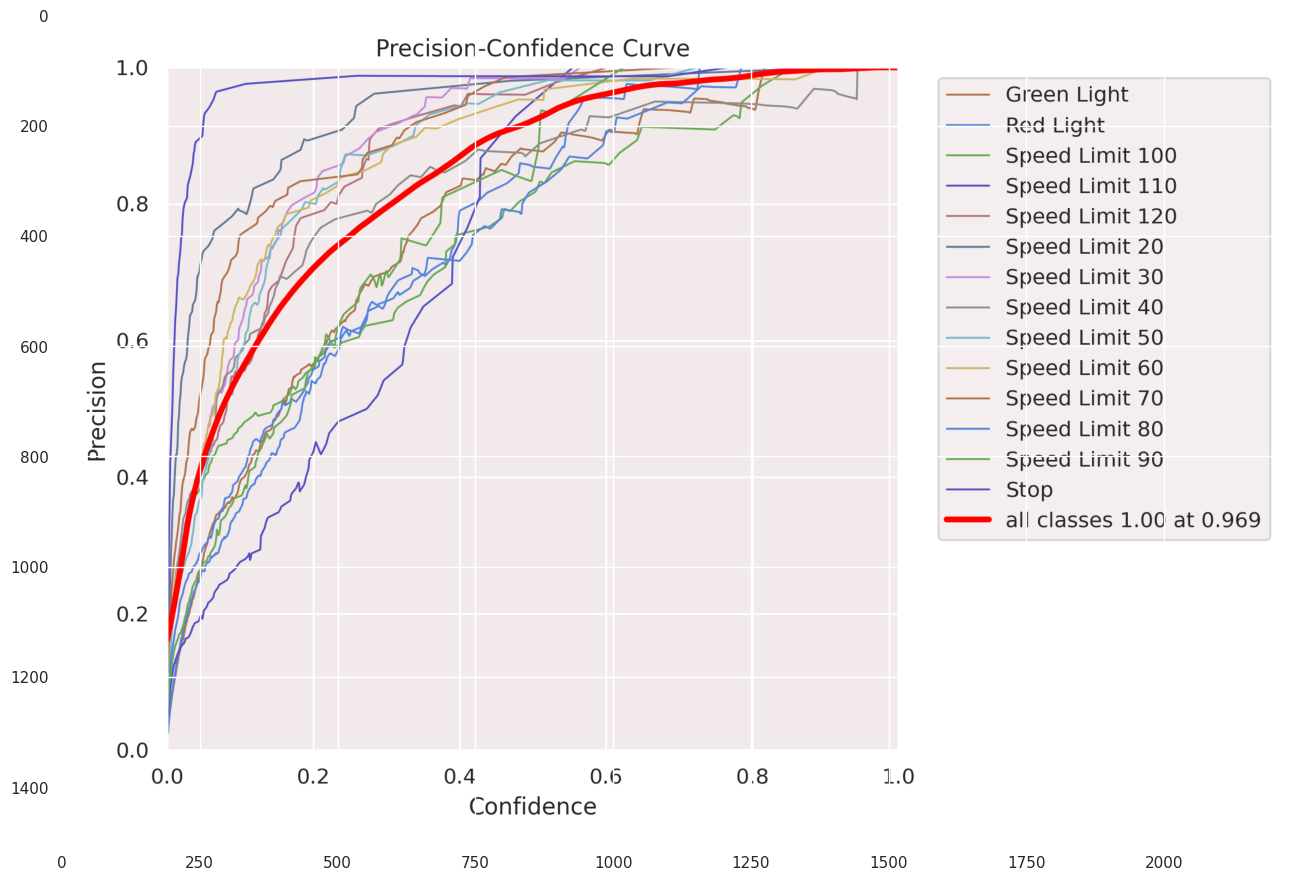

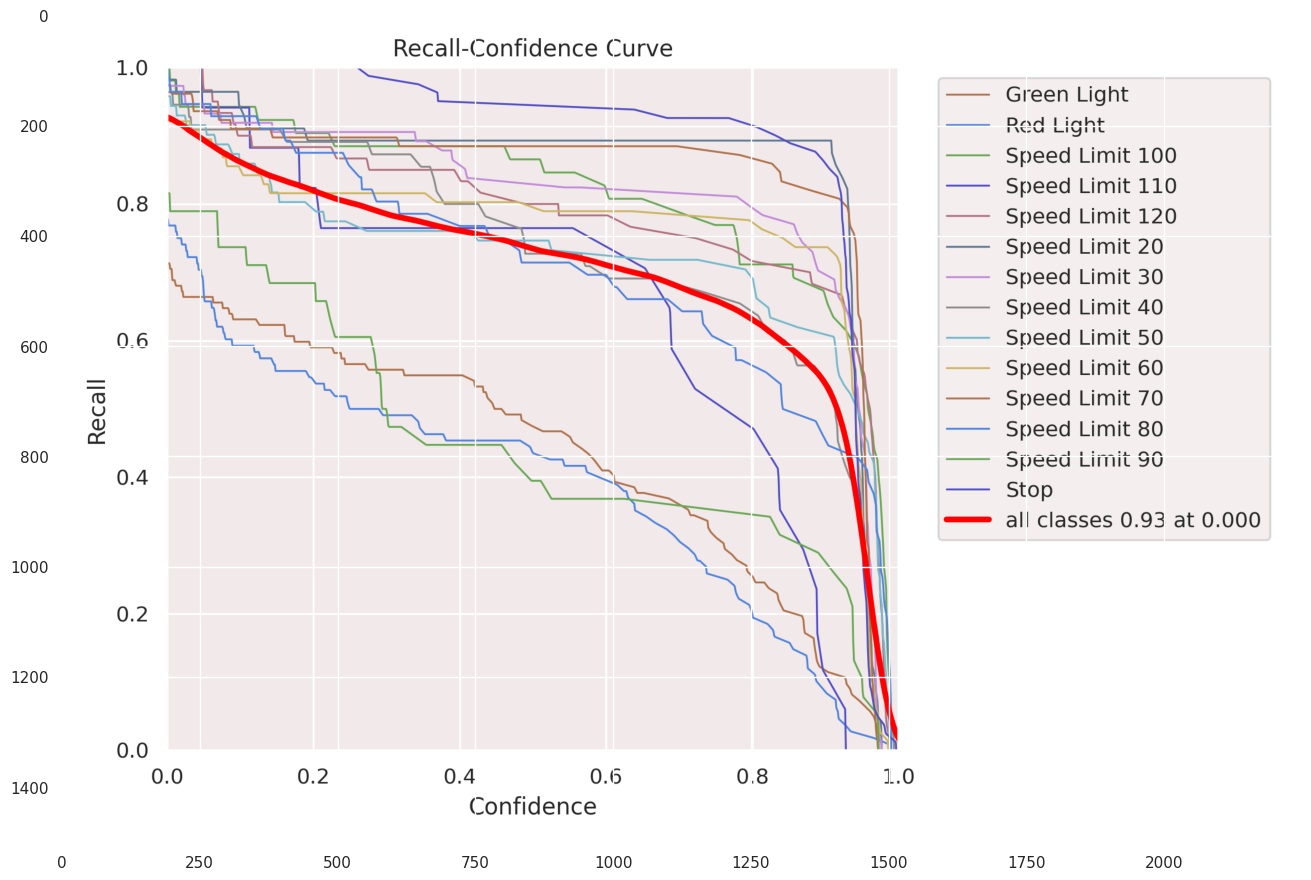

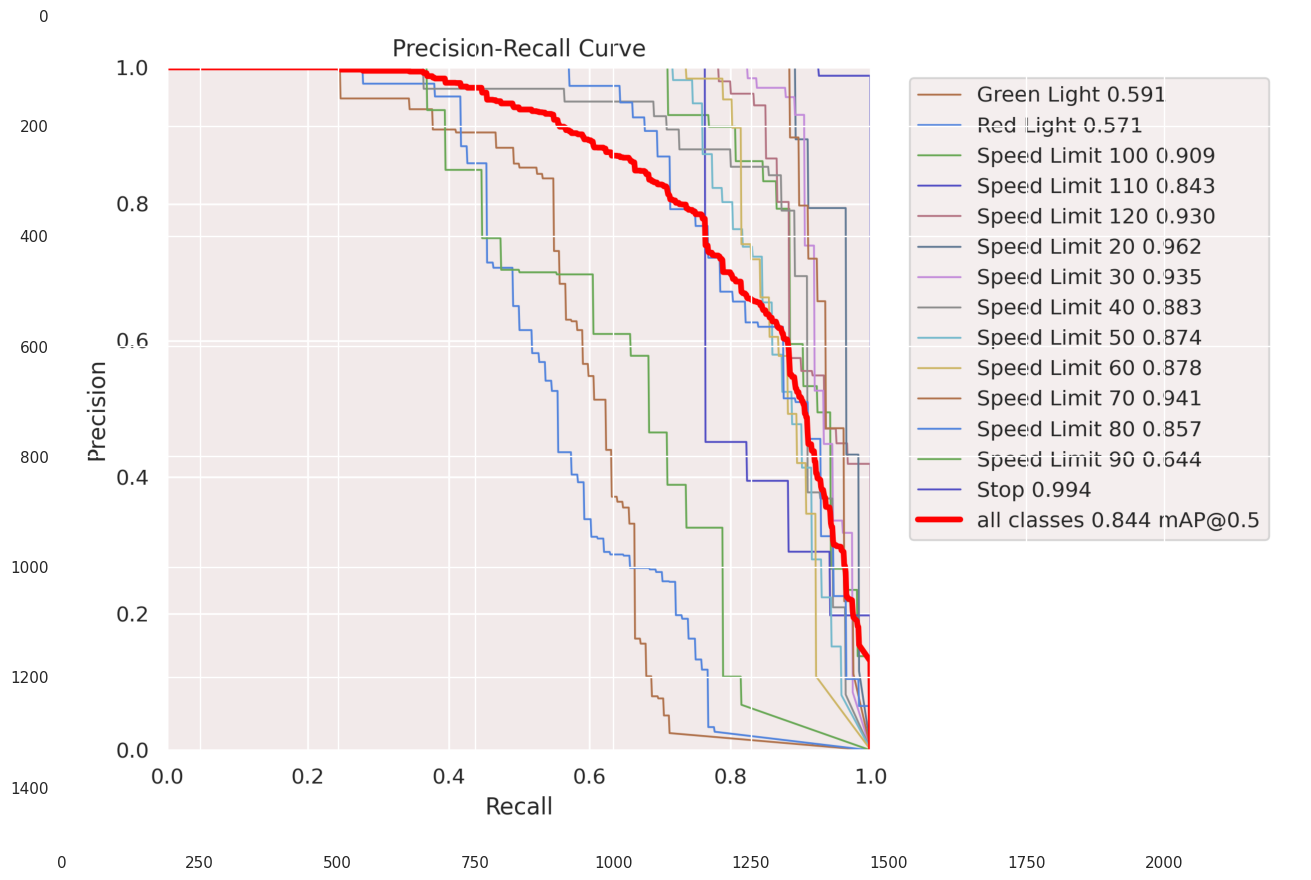

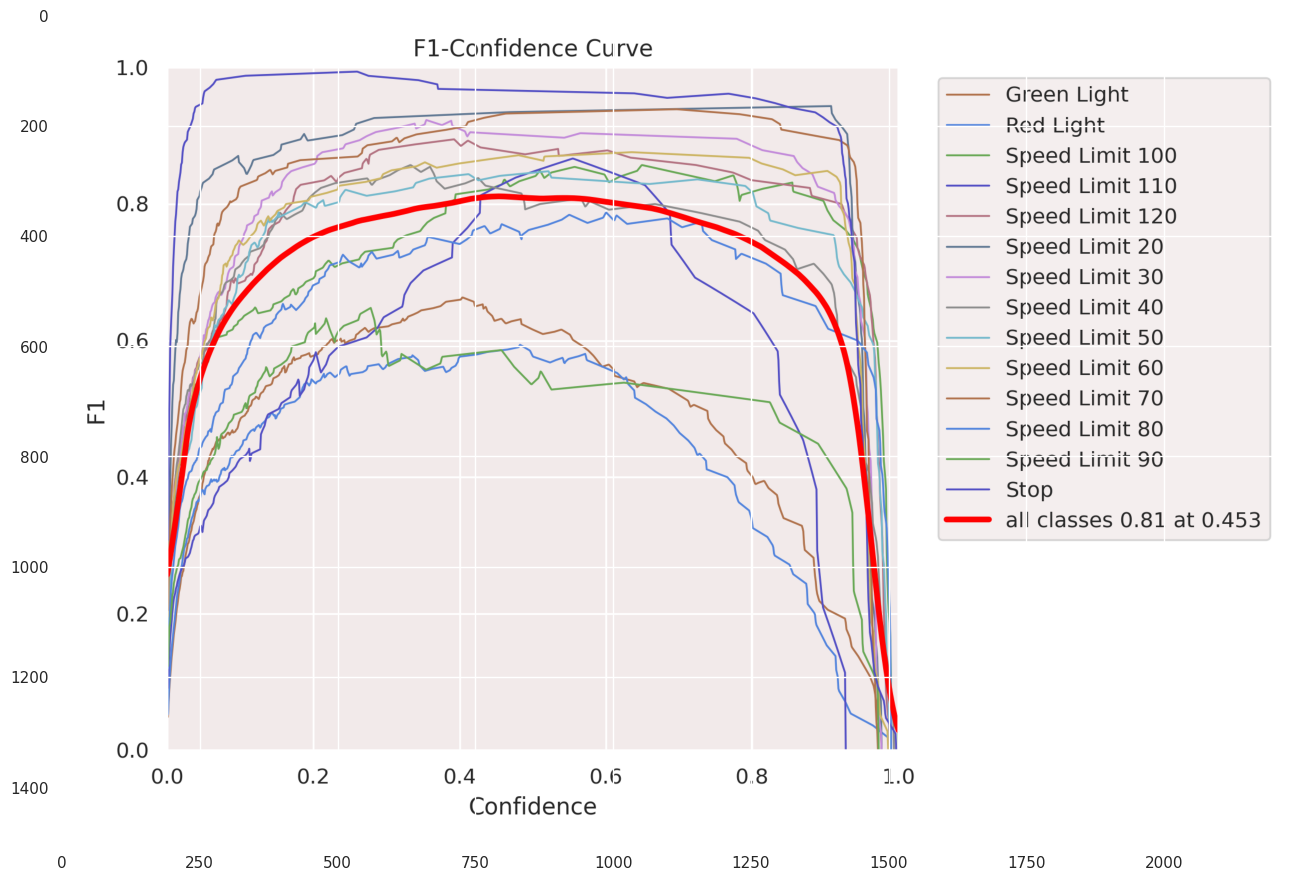

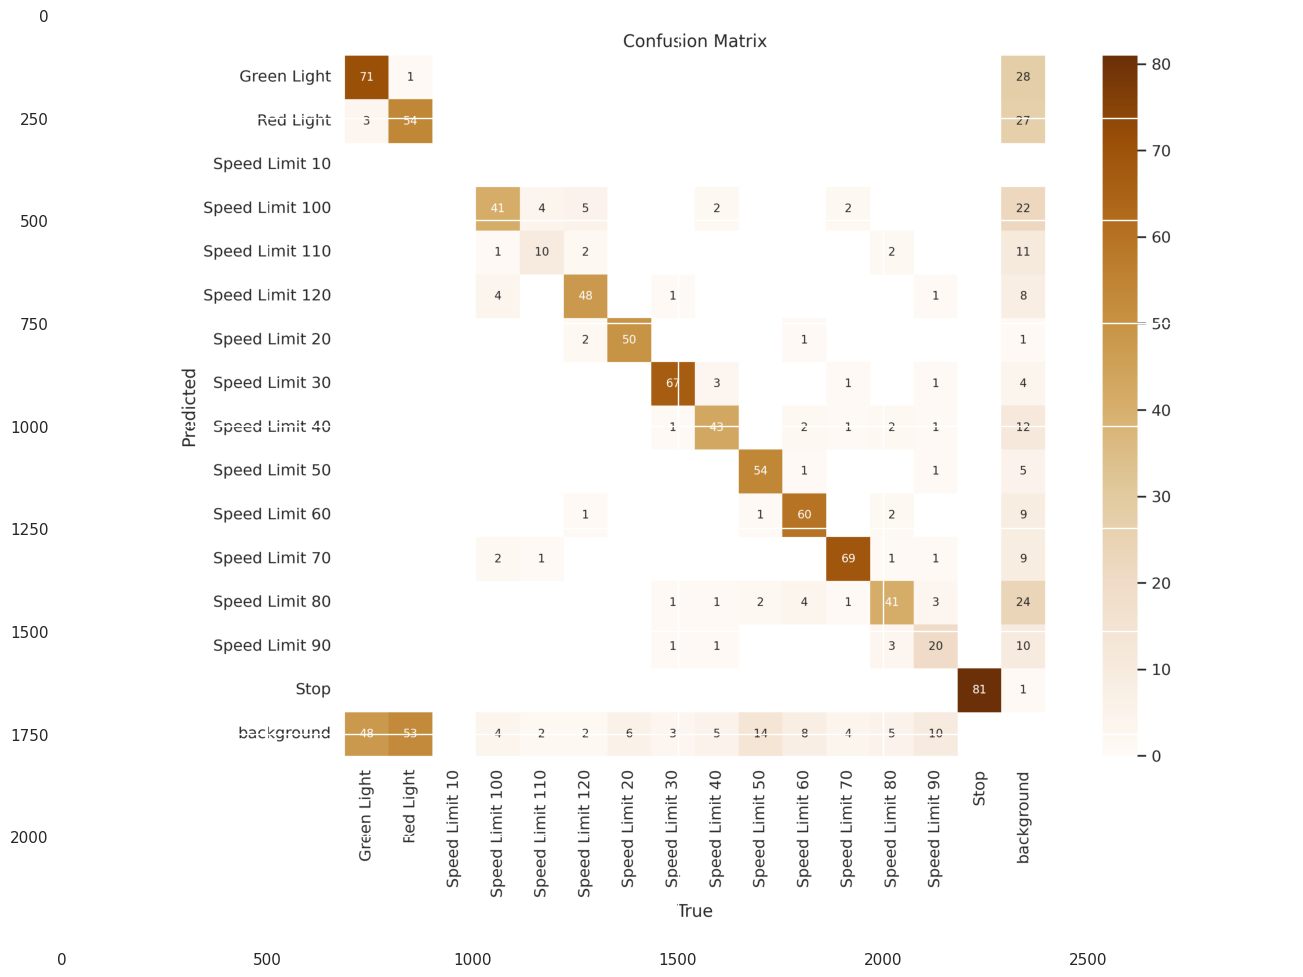

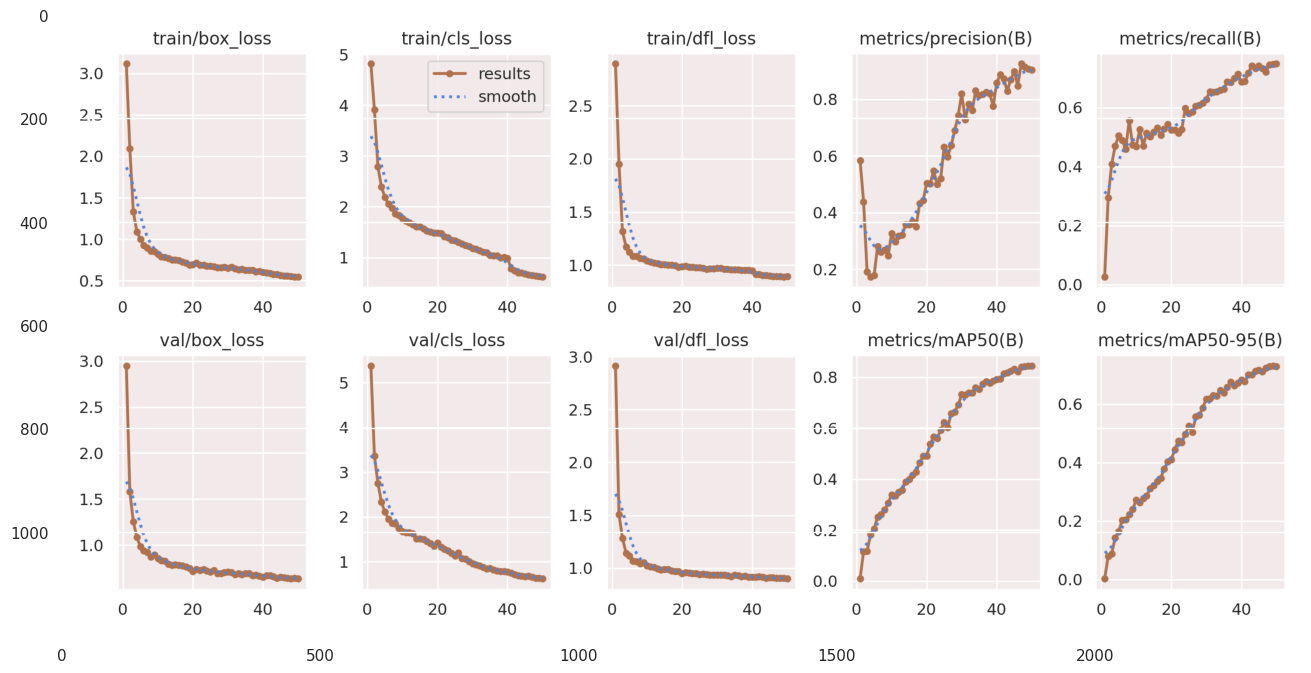

In [10]:
list_of_metrics = ["P_curve.png", "R_curve.png", "PR_curve.png", "F1_curve.png","confusion_matrix.png", "results.png"]
for i in list_of_metrics:
    
    image = cv2.imread(f'/kaggle/working/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

### Test the model on test data


image 1/1 /kaggle/input/cardetection/test/images/000983_JPG_jpg.rf.435a52389bec50fc37b8d83dc287f3ed.jpg: 416x416 3 Green Lights, 9.7ms
Speed: 1.3ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/test/images/00000_00005_00003_png.rf.df858754a637fecb106924e9bc47a832.jpg: 416x416 1 Speed Limit 20, 7.1ms
Speed: 0.8ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/test/images/000596_jpg.rf.eb635457db0d42d1d585000296f83145.jpg: 416x416 1 Speed Limit 80, 7.6ms
Speed: 0.8ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/test/images/FisheyeCamera_1_00476_png.rf.9039468fbc1dab58476b697e479807f8.jpg: 416x416 3 Green Lights, 7.5ms
Speed: 0.8ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /kaggle/input/cardetection/test/images/0005

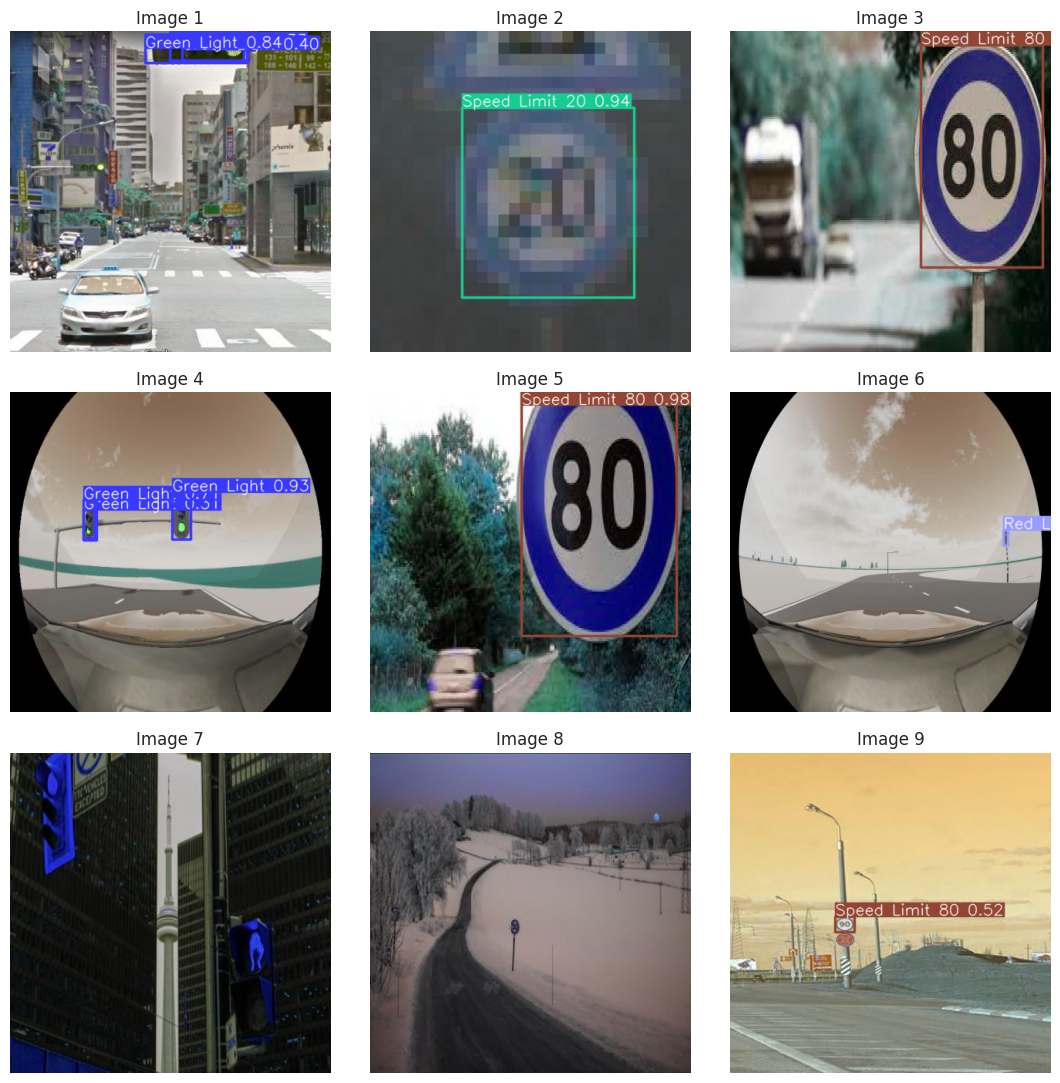

In [11]:
test_img_dir = '/kaggle/input/cardetection/test/images'
num_samples = 9
image_files = os.listdir(test_img_dir)
test_imgs = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3,3, figsize = (11, 11))
for i in range(num_samples):
    image = test_imgs[i]
    ax = axes[i // 3, i%3]
    result_predict = final_model.predict(source = os.path.join(test_img_dir, image), imgsz = (416))
    ax.imshow(result_predict[0].plot())
    ax.set_title(f'Image {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()